<a href="https://colab.research.google.com/github/TerriblePepito/TerriblePepitostest/blob/main/tradestypesdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv('Trad2507.csv',delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame

Saving Trad2507.csv to Trad2507.csv
  Instrument Volume        Date     P/P
0     GBPUSD  8'000  07,30,2025   4,56 
1     GBPUSD  8'000  07,30,2025   4,62 
2     GBPUSD  6'000  07,29,2025   4,53 
3     EURUSD  4'000  07,30,2025   2,30 
4     EURUSD  4'000  07,30,2025   4,50 


In [2]:
#subgroup of EUR/USD
dfvalue=df.loc[df['Instrument']=='EURUSD',['P/P','Volume']]

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%m,%d,%Y')

In [4]:
df['P/P'] = df['P/P'].str.replace(',', '.').astype(float)


In [16]:
df['Volume'] = df['Volume'].astype(str).str.replace("'", "").astype(float)

In [17]:
print(df.dtypes)

Instrument            object
Volume               float64
Date          datetime64[ns]
P/P                  float64
dtype: object


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2374966470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Instrument', data=df, palette='pastel')


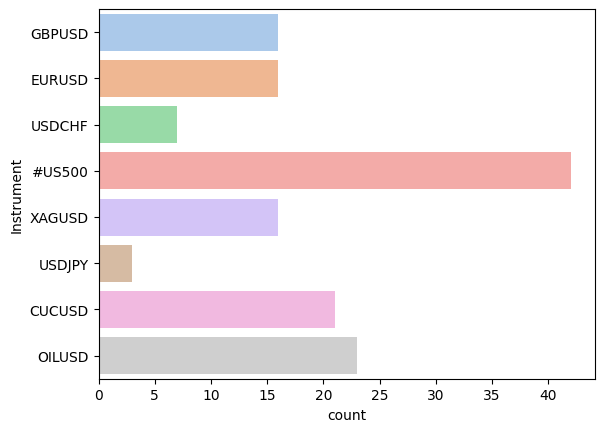

In [18]:
sns.countplot(y='Instrument', data=df, palette='pastel')
plt.show()

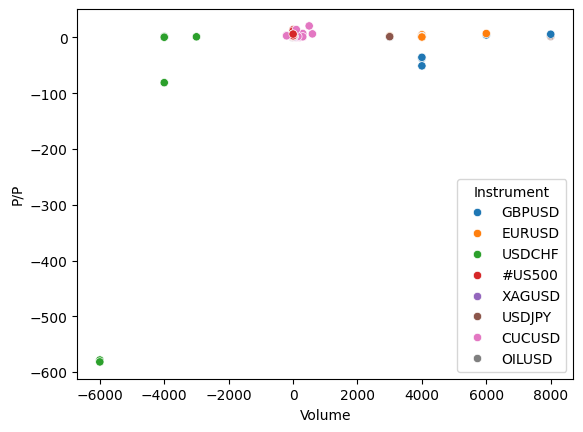

In [19]:
sns.scatterplot(x='Volume', y='P/P', data=df, hue="Instrument")
plt.show()

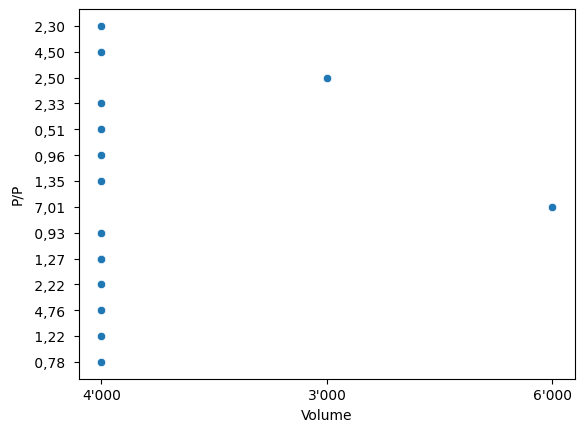

In [20]:
sns.scatterplot(x='Volume', y='P/P', data=dfvalue)
plt.show()

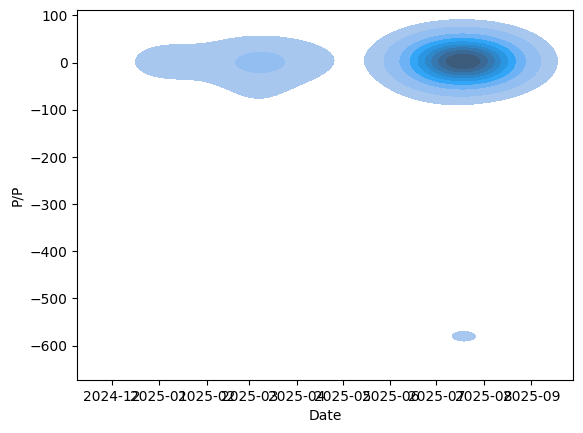

In [21]:
sns.kdeplot(data=df, x="Date", y="P/P", fill=True)
plt.show()

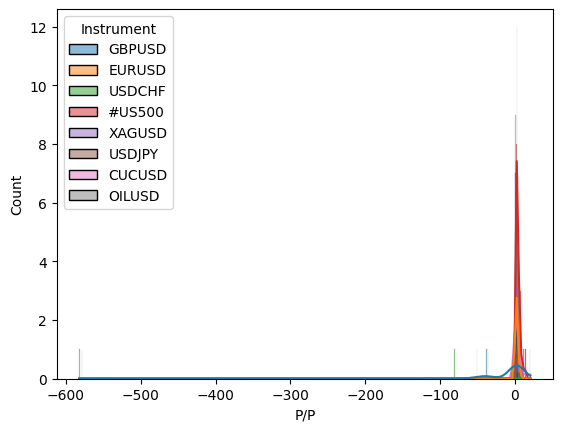

In [22]:
sns.histplot(data=df, x="P/P", kde=True, hue="Instrument")
plt.show()

In [23]:
total_pp_par_instrument = df.groupby('Instrument')['P/P'].sum()
print(total_pp_par_instrument)

Instrument
#US500     167.08
CUCUSD      81.70
EURUSD      35.18
GBPUSD     -93.79
OILUSD      45.33
USDCHF   -1237.36
USDJPY       7.11
XAGUSD      35.03
Name: P/P, dtype: float64


/tmp/ipython-input-1884350409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pp_par_instrument_sorted.index, y=total_pp_par_instrument_sorted.values, palette='viridis')


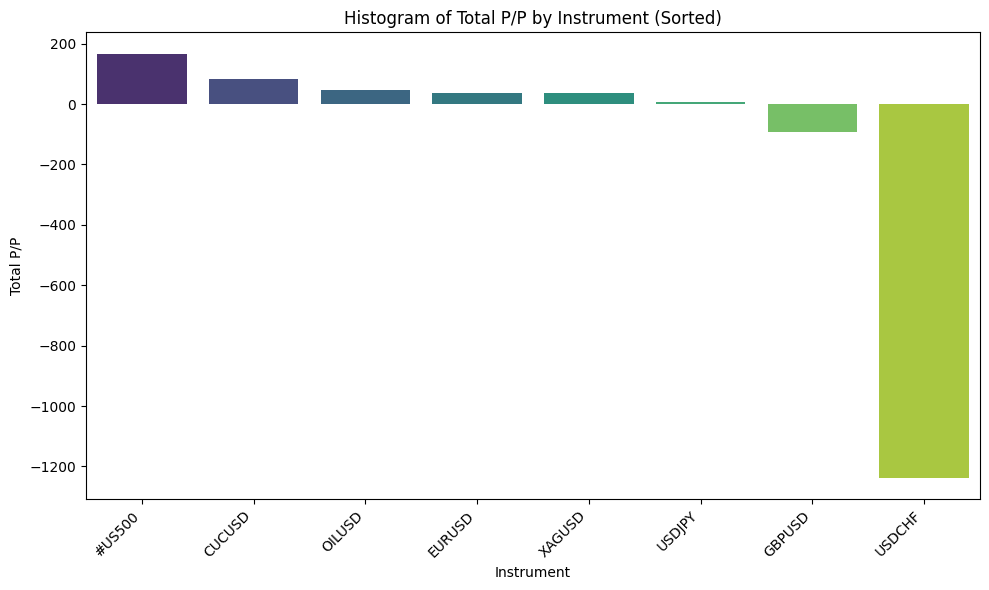

In [24]:
# prompt: peut tu me faire un histogramme des valeurs pp_par_instrument, sorted please

import matplotlib.pyplot as plt
total_pp_par_instrument_sorted = total_pp_par_instrument.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pp_par_instrument_sorted.index, y=total_pp_par_instrument_sorted.values, palette='viridis')
plt.xlabel('Instrument')
plt.ylabel('Total P/P')
plt.title('Histogram of Total P/P by Instrument (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()